# To do list & python pratice

Ersen'S Joseph 

**General goal:**
1. Read data in python including read several data from a folder
1. Make plots

**To-do list:** (specify a region)
- [x] Read data (one and sevarl)
- [x] Plot (SLA, SST)
- [x] Save plots
- [x] Set a range in bar graph
- [x] Plot vectors
- [x] plot more than one variable in a single figure 
- [x] Select a region automatically
- [x] Create for loop
- [x] download global dataset (SST...)
- [x] Subplot (oceanography type related plot)
- [ ] Make video out of plots or visualize the trajectories
- [ ] Fix SST scale 
- [ ] Write the date on the figures as text (title) 
- [ ] Read data from the cloud

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs                   #import projections
import cartopy
import gsw
import cftime

In [6]:
%matplotlib inline  
#%matplotlib qt5 
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

In [7]:
#file = '/Users/lfp/Documents/GitHub/satellite_python_2022V2/Data/dt_global_allsat_phy_l4_20190909_20210726.nc'
#file = '../Data/dt_global_allsat_phy_l4_20190909_20210726.nc'
#directory = '../Data1/*.nc'
#file = '../Data/SLA/20190701-IFR-L3C_GHRSST-SSTsubskin-ODYSSEA-GLOB_010_adjusted-v2.0-fv1.0.nc'
#file = '../Data/dataset-duacs-nrt(7:10:219).nc'
#file = '../Data/dt_global_allsat_phy_l4_20190909_20210726.nc'
#file = '../Data/Data/SLA/20210706-IFR-L3C_GHRSST-SSTsubskin-ODYSSEA-GLOB_010_adjusted-v2.0-fv1.0.nc'
#file = '../Data//20190708-IFR-L3C_GHRSST-SSTsubskin-ODYSSEA-GLOB_010_adjusted-v2.0-fv1.0.nc'

directory = '../Data1/*.nc'

In [8]:
#ds = xr.open_dataset(file)

In [9]:
ds = xr.open_mfdataset(directory)

In [10]:
ds

<xarray.Dataset>
Dimensions:    (time: 3, latitude: 82, longitude: 81)
Coordinates:
  * time       (time) datetime64[ns] 2019-07-10 2019-07-19 2019-07-22
  * latitude   (latitude) float64 4.875 5.125 5.375 5.625 ... 24.62 24.88 25.12
  * longitude  (longitude) float64 79.88 80.12 80.38 80.62 ... 99.38 99.62 99.88
Data variables:
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(3, 82, 81), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(3, 82, 81), meta=np.ndarray>
    crs        (time) float64 nan -2.147e+09 -2.147e+09
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(3, 82, 81), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                                    CF-1.6
    FROM_ORIGINAL_FILE__Metadata_Conventions:       Unidata Dataset Discovery...
    cdm_data_type:                                  Grid
    comment:                                        Sea Surface Height measur...
    contact:                                        servicedesk.cmems@mercato...
    creator_email:                                  servicedesk.cmems@mercato...
    ...                                             ...
    time_coverage_duration:                         P1D
    time_coverage_end:                              2020-12-31T12:00:00Z
    time_coverage_resolution:                       P1D
    time_coverage_start:                            2020-12-30T12:00:00Z
    title:                                          DT merged all satellites ...
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

In [11]:
sla = ds.sla

/Users/lfp/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


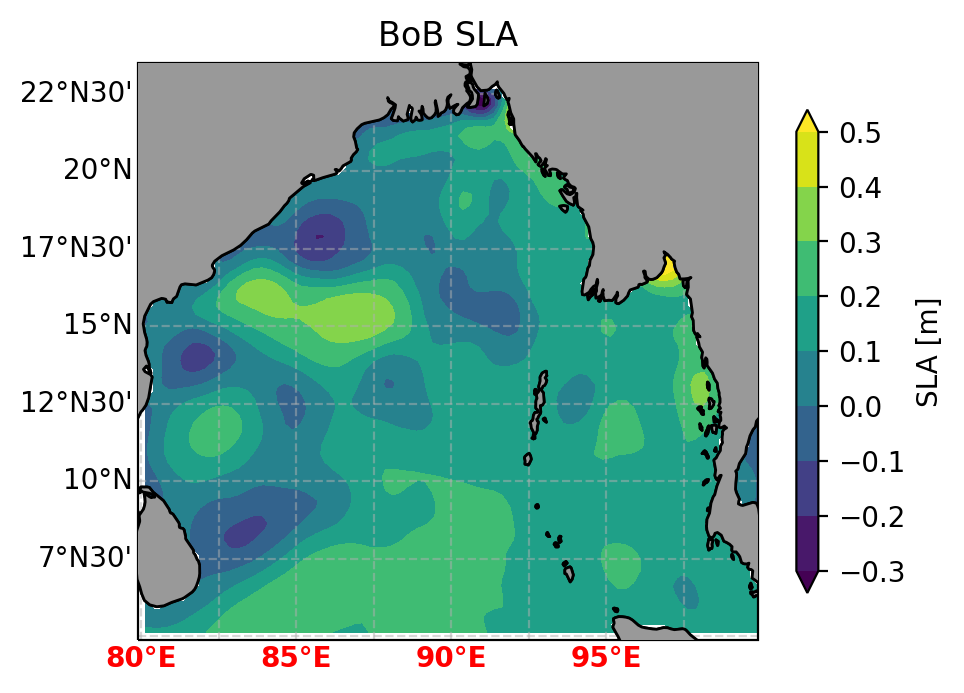

In [12]:
timeindex = 0
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_title('BoB SLA')

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}


levels = 10
cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(sla[timeindex ,:,:]), levels, extend='both', transform=ccrs.PlateCarree())
#cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
#cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')


In [13]:
# figure saving
__figdir__ = '../plots/' + 'BoB 7-22-2019'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'
# define savefig if we want to use if savefig 
savefig = 1

/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_14200/3205831068.py:13: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022, extend='both')


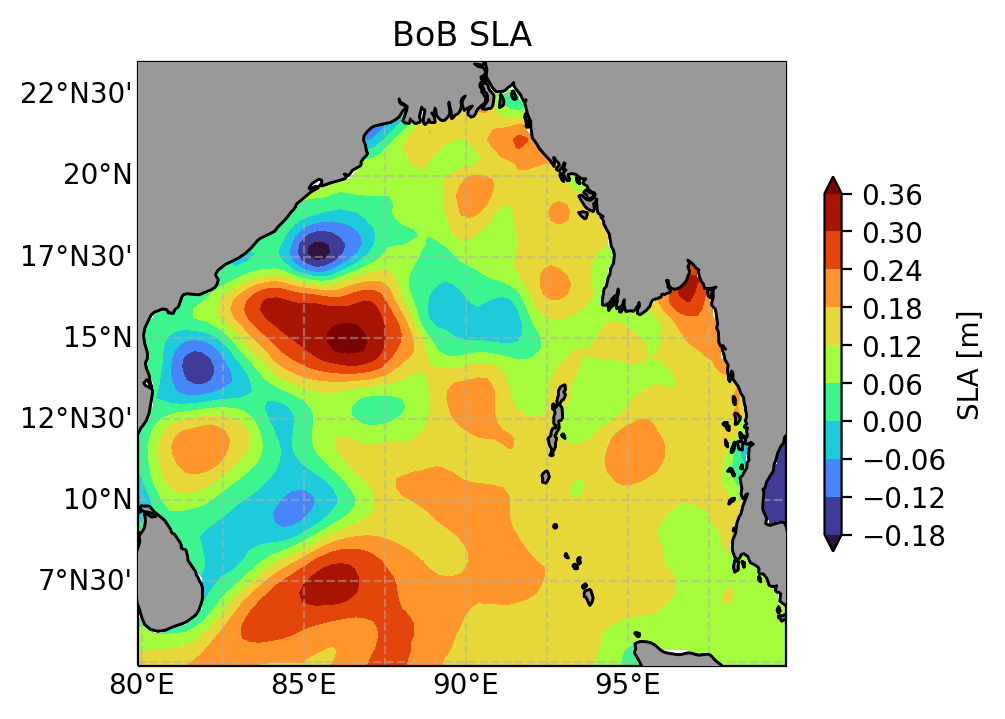

In [16]:
timeindex = 1
ax1 = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax1.set_title('BoB SLA')
plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
levels = 10
cs = ax1.contourf(ds.longitude,ds.latitude,np.squeeze(sla[timeindex ,:,:]), levels, extend='both', transform=ccrs.PlateCarree())
#cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
#cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)



l;;l
cb.set_label('SLA [m]',fontsize = 10)
ax1.coastlines()
ax1.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

if savefig:

    plt.savefig(__figdir__+'_SLA'+plotfiletype,**savefig_args)

/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_50440/3324067954.py:11: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022, extend='both')
/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_50440/3324067954.py:30: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022, extend='both')


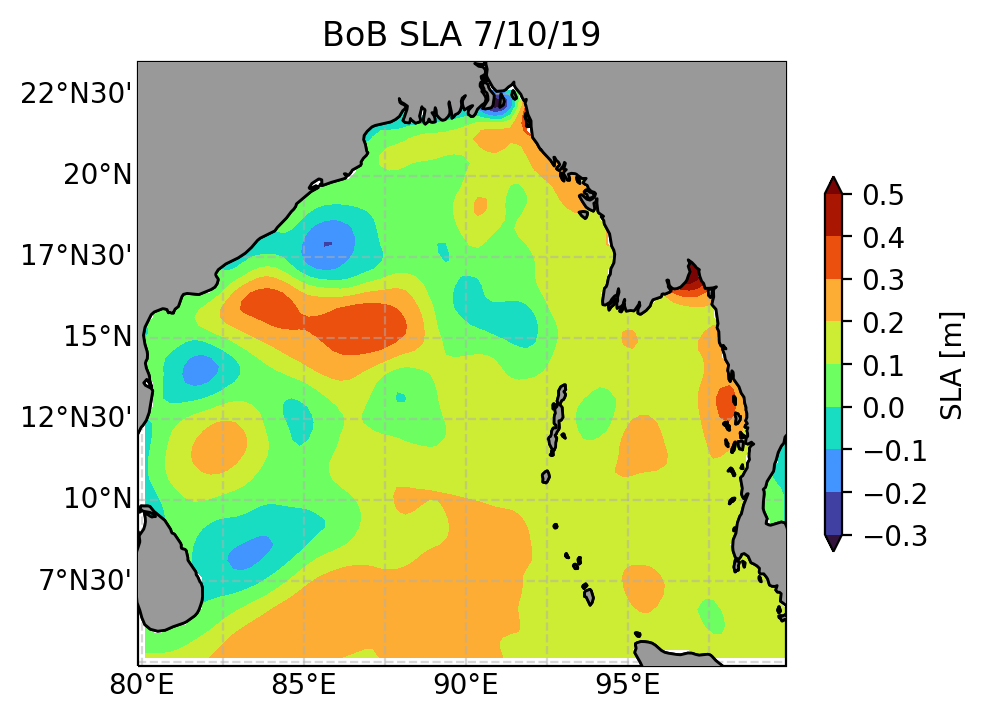

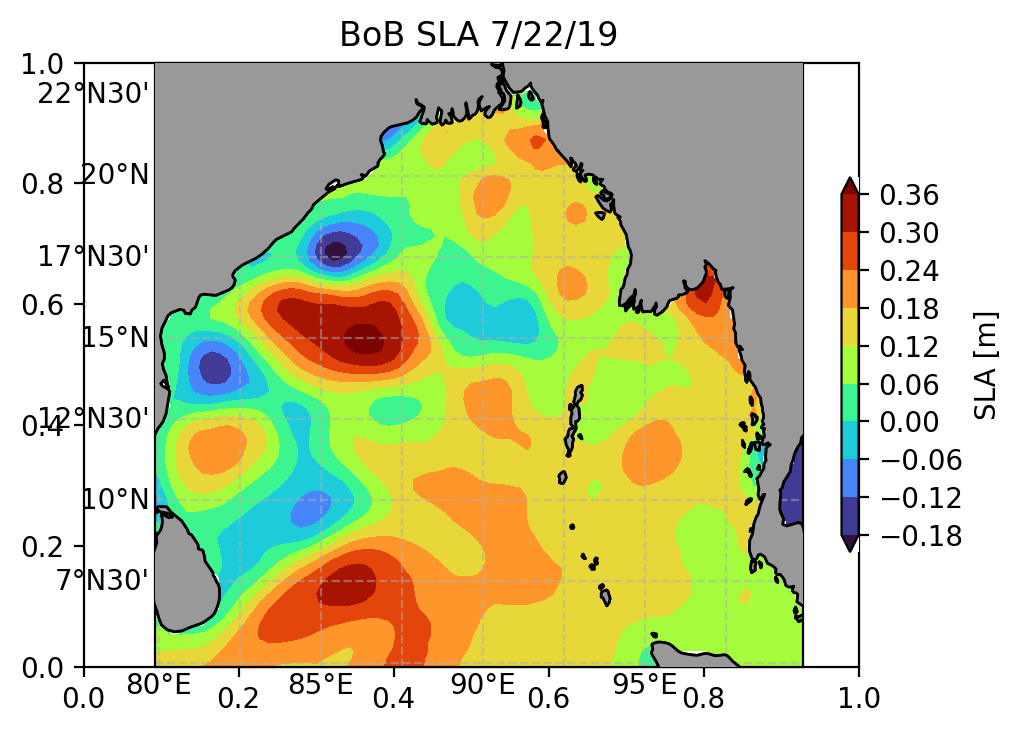

In [135]:

timeindex = 0
ax0 = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))
ax0.set_title('BoB SLA 7/10/19')

gl = ax0.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
levels = 10

cs = ax0.contourf(ds.longitude,ds.latitude,np.squeeze(sla[timeindex ,:,:]), levels, extend='both', transform=ccrs.PlateCarree())
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax0.coastlines()
ax0.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

plt.subplots()
#fig.tight_layout(pad=50.0)
#----------------------------------------------------------------------------------------------
timeindex = 1
ax1 = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))
ax1.set_title('BoB SLA 7/22/19')

plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
levels = 10

cs = ax1.contourf(ds.longitude,ds.latitude,np.squeeze(sla[timeindex ,:,:]), levels, extend='both', transform=ccrs.PlateCarree())
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax1.coastlines()
ax1.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')


In [15]:
def plot_variables(longitude,latitude,sla):
    
    cs = ax.contourf(longitude,latitude,np.squeeze(sla), levels, extend='both', transform=ccrs.PlateCarree())
    
    ax.set_title('BoB SLA')
    

    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.ylabels_right = False
    levels = 10
    cs = ax.contourf(longitude,latitude,np.squeeze(sla), levels, extend='both', transform=ccrs.PlateCarree())
    
    
    
    cb.set_label('SLA [m]',fontsize = 10)
    ax.coastlines()
    ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

    return ax,gl,cs,cb 
    
    
    

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

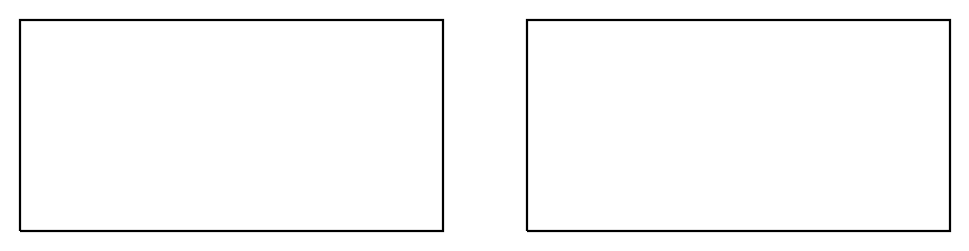

In [16]:
fig,axes = plt.subplots(1,2, subplot_kw = {'projection' : ccrs.PlateCarree(central_longitude=200)}, figsize = (6,8))
                       
                       
plot_variables(ds.longitude,ds.latitude,sla,axes[1,1])
                       